In [1]:
import pandas as pd
import os
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading videos for 2017/2018 and 2020/2022 seperately

path = r'\all_videos_preprocess' # change if you ran it on your personal environment

all_videos = os.listdir(path)
data17_18 = pd.DataFrame()
data20_22 = pd.DataFrame()
for video in all_videos :  
    channel = str("\\") + video
    data = pd.read_csv(path+channel)
    if 'data17_18' in video :
        data17_18 = data17_18.append(data)
    else:
        data20_22 = data20_22.append(data)

In [3]:
# Mapping YouTube Video Categories

YouTubeVideoCategories = {1:'Film & Animation', 2:'Autos & Vehicles', 10:'Music', 15:'Pets & Animals', 17:'Sports',
                          19:'Travel & Events', 20:'Gaming', 22:'People & Blogs',23:'Comedy', 24:'Entertainment',
                          25:'News & Politics', 26:'Howto & Style', 27:'Education', 28:'Science & Technology',
                          29:'Nonprofits & Activism'}

data17_18['Category'] = data17_18['Category'].apply(lambda x : YouTubeVideoCategories[x])
data20_22['Category'] = data20_22['Category'].apply(lambda x : YouTubeVideoCategories[x])

In [4]:
# defining covid data
def split_covid_data(data):
    data['Publish time'] = pd.to_datetime(data['Publish time'].astype(str), format='%Y/%m/%d')
    dataCovid    = data[data['Publish time']<'2022/04/30']
    return dataCovid
data20_22 = split_covid_data(data20_22)

# Comparing covid and before covid youtube trending videos tendancies

<AxesSubplot:title={'center':'Composition of youtube videos between 2017/2018'}, xlabel='Category', ylabel='count'>

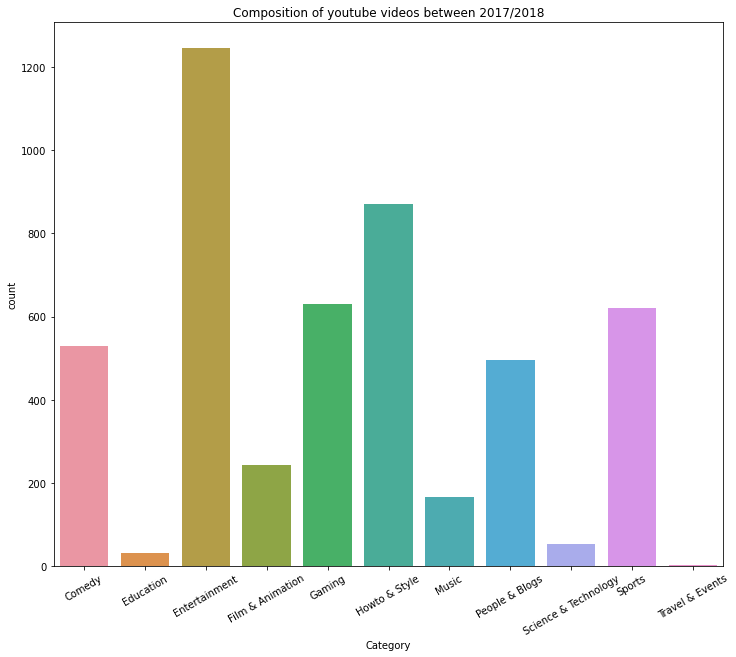

In [5]:
# composition of youtube videos of 2017/2018
figure = plt.figure(figsize=(12,10))
plt.xticks(rotation=30)
plt.title('Composition of youtube videos between 2017/2018')
sns.countplot(x='Category', data=data17_18.sort_values(by=['Category']))

<AxesSubplot:title={'center':'Composition of youtube videos between 2020/2022'}, xlabel='Category', ylabel='count'>

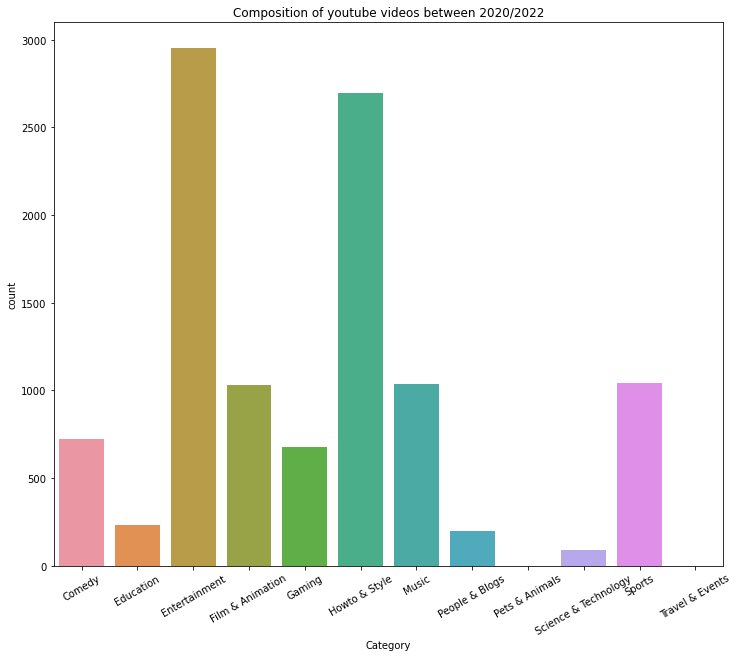

In [6]:
# composition of youtube videos of 2020/2022
figure = plt.figure(figsize=(12,10))
plt.xticks(rotation=30)
plt.title('Composition of youtube videos between 2020/2022')
sns.countplot(x='Category', data=data20_22.sort_values(by=['Category']))

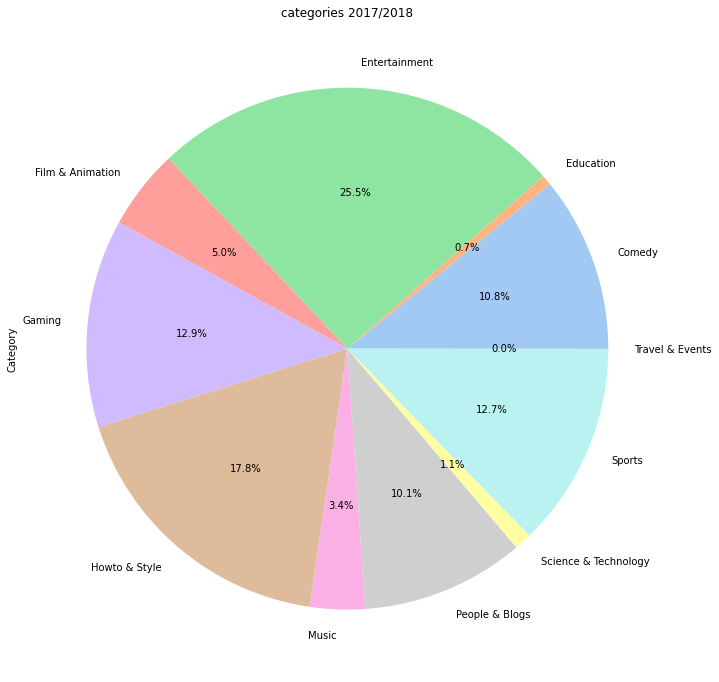

In [7]:
#create pie chart of categories 2017/2018
figure = plt.figure(figsize=(14,12))
colors = sns.color_palette('pastel')[0:15]
data17_18.groupby("Category")['Category'].count().plot.pie(colors = colors, autopct='%.1f%%')
plt.title('categories 2017/2018')
plt.show()

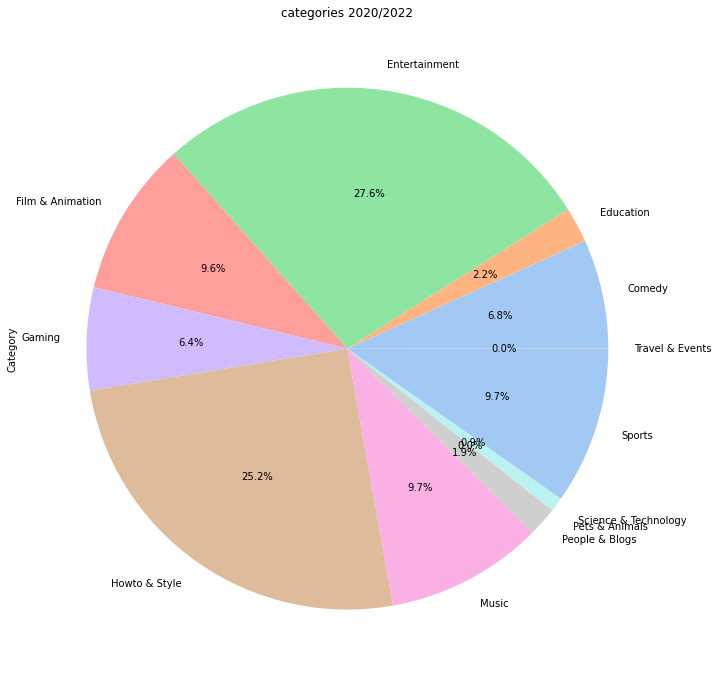

In [8]:
#create pie chart of categories 2020/2022
figure = plt.figure(figsize=(14,12))
colors = sns.color_palette('pastel')[0:15]
data20_22.groupby("Category")['Category'].count().plot.pie(colors = colors, autopct='%.1f%%')
plt.title('categories 2020/2022')
plt.show()

<AxesSubplot:title={'center':'Number of times youtube videos trending in 2017/2018'}, xlabel='trending times', ylabel='count'>

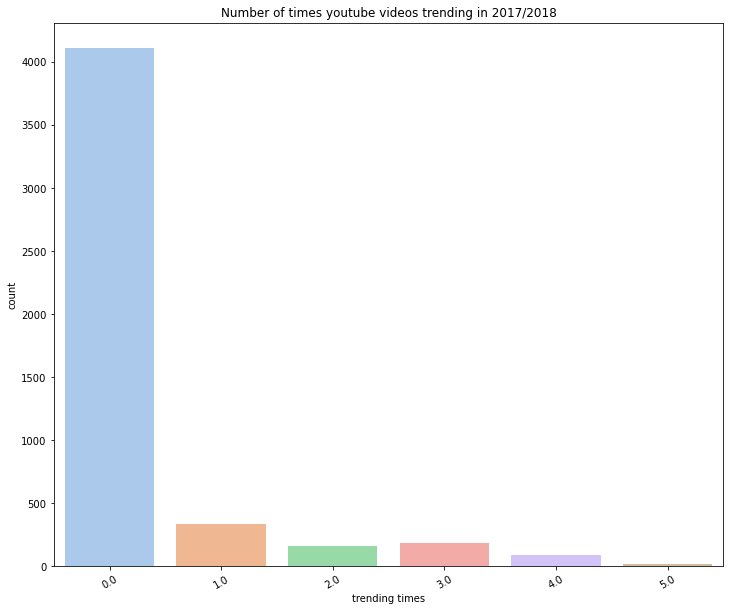

In [9]:
# Number of times youtube videos trending in 2017/2018
figure = plt.figure(figsize=(12,10))
colors = sns.color_palette('pastel')[0:15]
plt.xticks(rotation=30)
plt.title('Number of times youtube videos trending in 2017/2018')
sns.countplot(x='trending times', data=data17_18.sort_values(by=['trending times']), palette=colors)

<AxesSubplot:title={'center':'Number of times youtube videos trending in 2020/2022'}, xlabel='trending times', ylabel='count'>

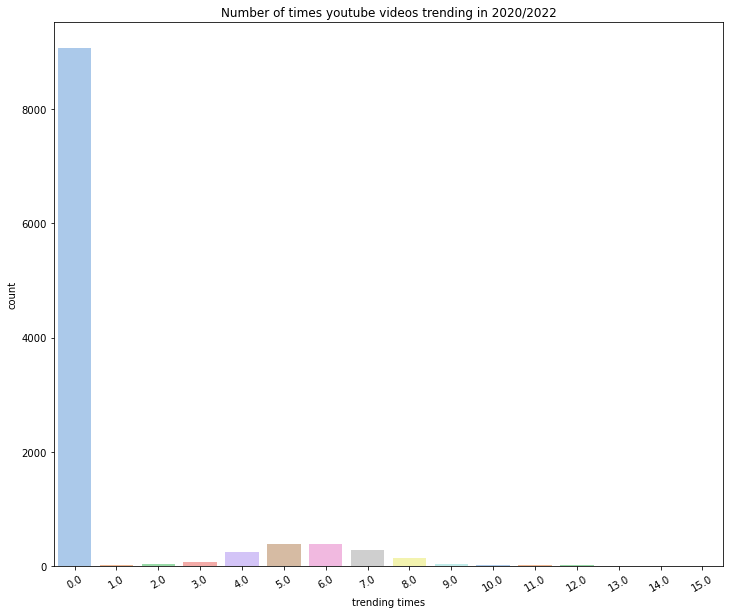

In [10]:
# Number of times youtube videos trending in 2020/2022
figure = plt.figure(figsize=(12,10))
colors = sns.color_palette('pastel')[0:15]
plt.xticks(rotation=30)
plt.title('Number of times youtube videos trending in 2020/2022')
sns.countplot(x='trending times', data=data20_22.sort_values(by=['trending times']), palette=colors)

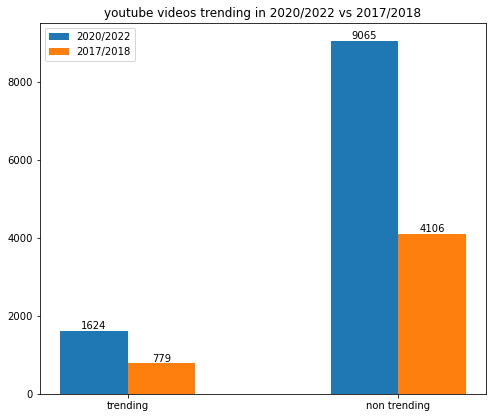

In [11]:
# youtube videos trending in 2020/2022 vs 2017/2018
figure = plt.figure(figsize=(8,15))
colors = sns.color_palette('pastel')[0:15]

x = np.array([0,1])
w = 0.25
ax = plt.subplot(211)
bar1 = ax.bar(x-w/2, [(data20_22['trending times']>0).sum(),(data20_22['trending times']==0).sum()], w, label='2020/2022')
bar2 = ax.bar(x+w/2, [(data17_18['trending times']>0).sum(),(data17_18['trending times']==0).sum()], w, label='2017/2018')
ax.set_xticks(x, ['trending', 'non trending'])
ax.bar_label(bar1)
ax.bar_label(bar2)
plt.title('youtube videos trending in 2020/2022 vs 2017/2018')
plt.legend()
#sns.countplot(x='trending times', data=data20_22.sort_values(by=['trending times']), palette=colors)

<AxesSubplot:title={'center':'Mean of trending times by category in 2017/2018 by category'}, xlabel='Category', ylabel='trending times'>

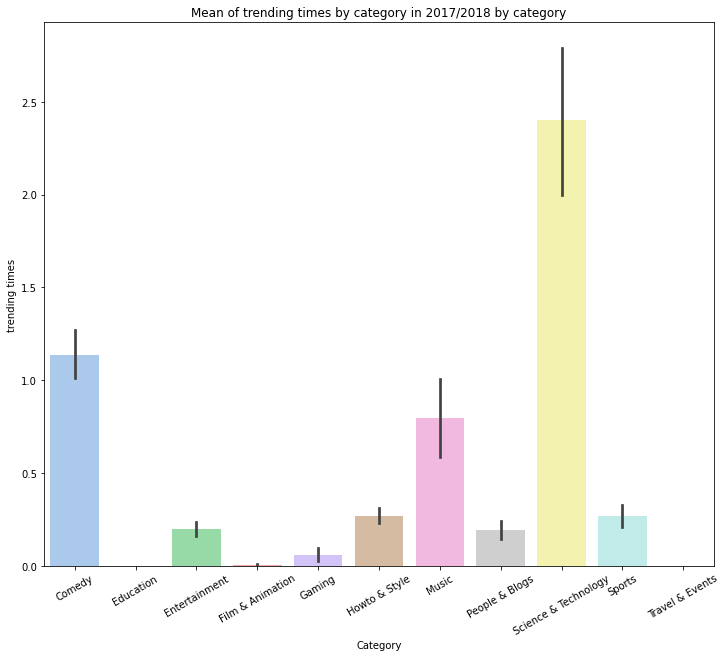

In [12]:
# Mean of trending times by category in 2017/2018 by category
figure = plt.figure(figsize=(12,10))
colors = sns.color_palette('pastel')[0:15]
plt.xticks(rotation=30)
plt.title('Mean of trending times by category in 2017/2018 by category')
sns.barplot(x='Category', y='trending times', 
            data=data17_18.sort_values(by=['Category']), palette=colors)

<AxesSubplot:title={'center':'Mean of trending times by category in 2020/2022 by category'}, xlabel='Category', ylabel='trending times'>

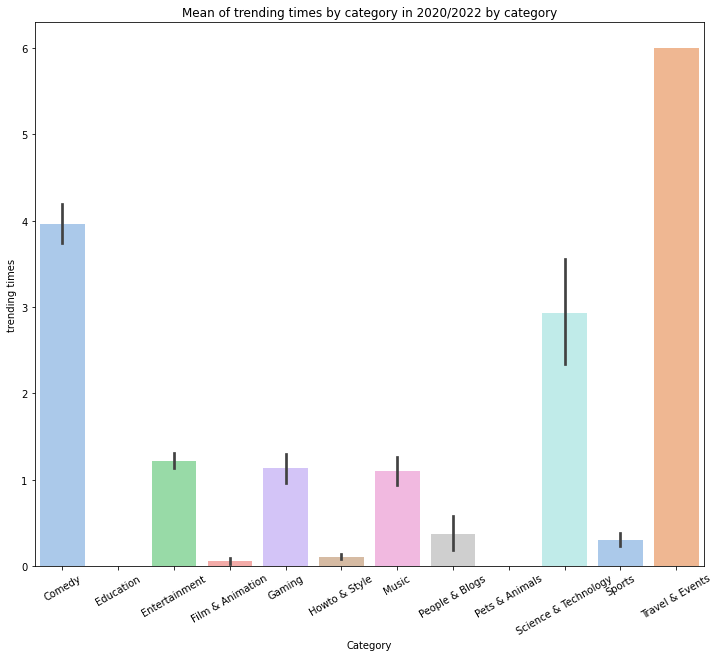

In [13]:
# Mean of trending times by category in 2020/2022 by category
figure = plt.figure(figsize=(12,10))
colors = sns.color_palette('pastel')[0:15]
plt.xticks(rotation=30)
plt.title('Mean of trending times by category in 2020/2022 by category')
sns.barplot(x='Category', y='trending times', 
            data=data20_22.sort_values(by=['Category']), palette=colors)

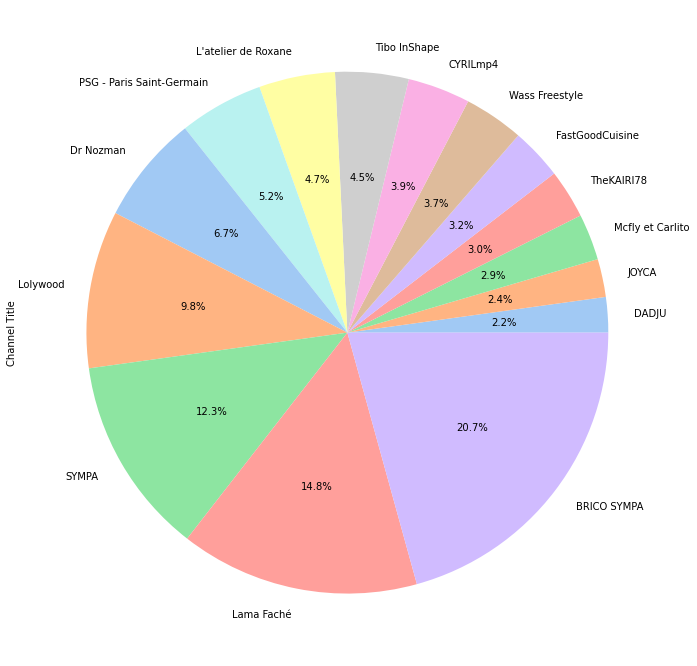

In [14]:
#create pie chart of 10 most trending youtube channels 2017/2018
figure = plt.figure(figsize=(14,12))
colors = sns.color_palette('pastel')[0:17]
data17_18[data17_18['trending times']>0].groupby("Channel Title")['Channel Title'].count().sort_values()[-15:].plot.pie(
    colors = colors,
    autopct='%.1f%%')
plt.show()

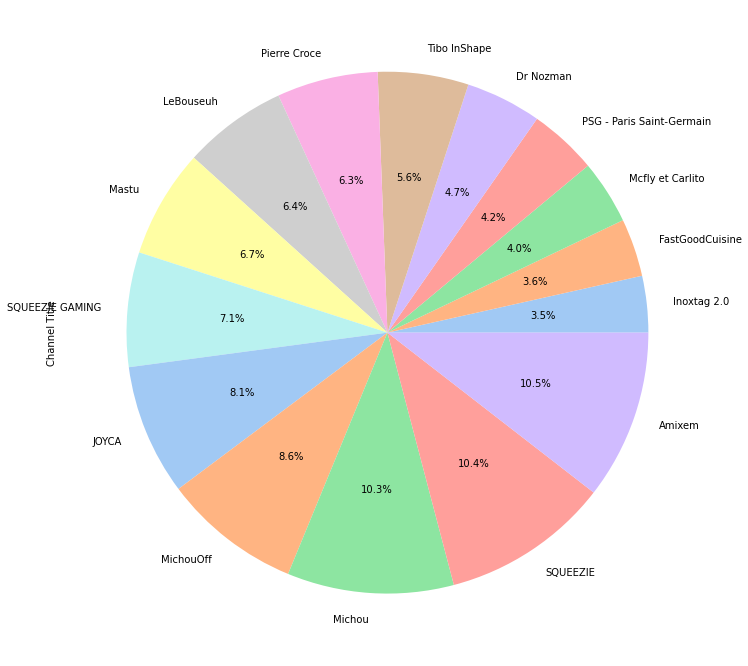

In [15]:
#create pie chart of 15 most trending youtube channels 2020/2022
figure = plt.figure(figsize=(14,12))
colors = sns.color_palette('pastel')[0:17]
data20_22[data20_22['trending times']>0].groupby("Channel Title")['Channel Title'].count().sort_values()[-15:].plot.pie(
    colors = colors,
    autopct='%.1f%%')
plt.show()

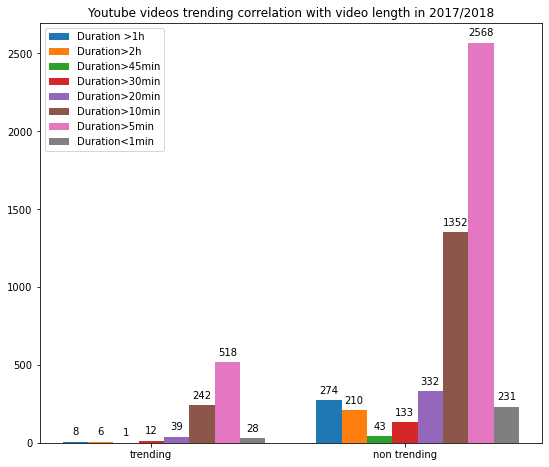

In [16]:
# youtube videos trending correlation with video length in 2017/2018
figure = plt.figure(figsize=(9,17))
colors = sns.color_palette('pastel')[0:15]

trending = data17_18[data17_18['trending times']>0]
non_trending = data17_18[data17_18['trending times']==0]

x = np.array([0,2.5])
w = 0.25
ax = plt.subplot(211)
bar1 = ax.bar(x-3*w, [trending[trending['Duration'].apply(lambda x : len(str(x).split(":"))==3)].count()[0],
                 non_trending[non_trending['Duration'].apply(lambda x : len(str(x).split(":"))==3)].count()[0]],
              w, label='Duration >1h')

bar2 = ax.bar(x-2*w, [trending[trending['Duration'].apply(lambda x : len(str(x).split(":"))==3 
                                                        and int(str(x).split(":")[0])>1)].count()[0], 
                 non_trending[non_trending['Duration'].apply(lambda x : len(str(x).split(":"))==3 
                                                        and int(str(x).split(":")[0])>1)].count()[0]],
              w, label='Duration>2h')

bar3 = ax.bar(x-w, [trending[trending['Duration'].apply(lambda x : len(str(x).split(":"))==2 
                                                        and int(str(x).split(":")[0])>45)].count()[0], 
                 non_trending[non_trending['Duration'].apply(lambda x : len(str(x).split(":"))==2 
                                                        and int(str(x).split(":")[0])>45)].count()[0]],
              w, label='Duration>45min')

bar4 = ax.bar(x, [trending[trending['Duration'].apply(lambda x : len(str(x).split(":"))==2 
                                                        and int(str(x).split(":")[0])>30)].count()[0], 
                 non_trending[non_trending['Duration'].apply(lambda x : len(str(x).split(":"))==2 
                                                        and int(str(x).split(":")[0])>30)].count()[0]],
              w, label='Duration>30min')

bar5 = ax.bar(x+w, [trending[trending['Duration'].apply(lambda x : len(str(x).split(":"))==2 
                                                        and int(str(x).split(":")[0])>20)].count()[0], 
                 non_trending[non_trending['Duration'].apply(lambda x : len(str(x).split(":"))==2 
                                                        and int(str(x).split(":")[0])>20)].count()[0]],
              w, label='Duration>20min')

bar6 = ax.bar(x+2*w, [trending[trending['Duration'].apply(lambda x : len(str(x).split(":"))==2 
                                                        and int(str(x).split(":")[0])>10)].count()[0], 
                 non_trending[non_trending['Duration'].apply(lambda x : len(str(x).split(":"))==2 
                                                        and int(str(x).split(":")[0])>10)].count()[0]],
              w, label='Duration>10min')

bar7 = ax.bar(x+3*w, [trending[trending['Duration'].apply(lambda x : len(str(x).split(":"))==2 
                                                        and int(str(x).split(":")[0])>5)].count()[0], 
                 non_trending[non_trending['Duration'].apply(lambda x : len(str(x).split(":"))==2 
                                                        and int(str(x).split(":")[0])>5)].count()[0]],
              w, label='Duration>5min')

bar8 = ax.bar(x+4*w, [trending[trending['Duration'].apply(lambda x : len(str(x).split(":"))==1)].count()[0] , 
                 non_trending[non_trending['Duration'].apply(lambda x : len(str(x).split(":"))==1)].count()[0]],
              w, label='Duration<1min')

ax.set_xticks(x, ['trending', 'non trending'])
ax.bar_label(bar1, padding=5)
ax.bar_label(bar2, padding=5)
ax.bar_label(bar3, padding=5)
ax.bar_label(bar4, padding=5)
ax.bar_label(bar5, padding=5)
ax.bar_label(bar6, padding=5)
ax.bar_label(bar7, padding=5)
ax.bar_label(bar8, padding=5)

plt.title('Youtube videos trending correlation with video length in 2017/2018')
plt.legend()
plt.show()

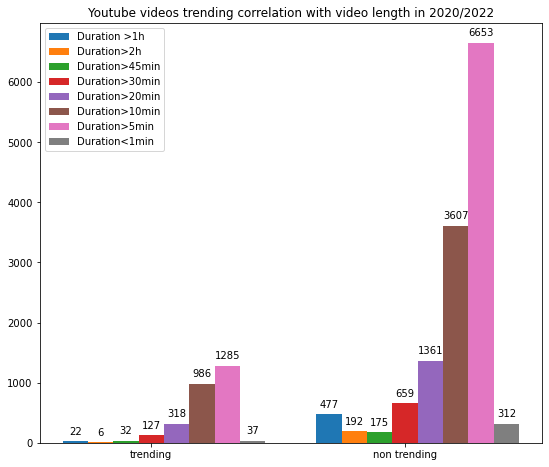

In [17]:
# youtube videos trending correlation with video length in 2020/2022
figure = plt.figure(figsize=(9,17))
colors = sns.color_palette('pastel')[0:15]

trending = data20_22[data20_22['trending times']>0]
non_trending = data20_22[data20_22['trending times']==0]

x = np.array([0,2.5])
w = 0.25
ax = plt.subplot(211)
bar1 = ax.bar(x-3*w, [trending[trending['Duration'].apply(lambda x : len(str(x).split(":"))==3)].count()[0],
                 non_trending[non_trending['Duration'].apply(lambda x : len(str(x).split(":"))==3)].count()[0]],
              w, label='Duration >1h')

bar2 = ax.bar(x-2*w, [trending[trending['Duration'].apply(lambda x : len(str(x).split(":"))==3 
                                                        and int(str(x).split(":")[0])>1)].count()[0], 
                 non_trending[non_trending['Duration'].apply(lambda x : len(str(x).split(":"))==3 
                                                        and int(str(x).split(":")[0])>1)].count()[0]],
              w, label='Duration>2h')

bar3 = ax.bar(x-w, [trending[trending['Duration'].apply(lambda x : len(str(x).split(":"))==2 
                                                        and int(str(x).split(":")[0])>45)].count()[0], 
                 non_trending[non_trending['Duration'].apply(lambda x : len(str(x).split(":"))==2 
                                                        and int(str(x).split(":")[0])>45)].count()[0]],
              w, label='Duration>45min')

bar4 = ax.bar(x, [trending[trending['Duration'].apply(lambda x : len(str(x).split(":"))==2 
                                                        and int(str(x).split(":")[0])>30)].count()[0], 
                 non_trending[non_trending['Duration'].apply(lambda x : len(str(x).split(":"))==2 
                                                        and int(str(x).split(":")[0])>30)].count()[0]],
              w, label='Duration>30min')

bar5 = ax.bar(x+w, [trending[trending['Duration'].apply(lambda x : len(str(x).split(":"))==2 
                                                        and int(str(x).split(":")[0])>20)].count()[0], 
                 non_trending[non_trending['Duration'].apply(lambda x : len(str(x).split(":"))==2 
                                                        and int(str(x).split(":")[0])>20)].count()[0]],
              w, label='Duration>20min')

bar6 = ax.bar(x+2*w, [trending[trending['Duration'].apply(lambda x : len(str(x).split(":"))==2 
                                                        and int(str(x).split(":")[0])>10)].count()[0], 
                 non_trending[non_trending['Duration'].apply(lambda x : len(str(x).split(":"))==2 
                                                        and int(str(x).split(":")[0])>10)].count()[0]],
              w, label='Duration>10min')

bar7 = ax.bar(x+3*w, [trending[trending['Duration'].apply(lambda x : len(str(x).split(":"))==2 
                                                        and int(str(x).split(":")[0])>5)].count()[0], 
                 non_trending[non_trending['Duration'].apply(lambda x : len(str(x).split(":"))==2 
                                                        and int(str(x).split(":")[0])>5)].count()[0]],
              w, label='Duration>5min')

bar8 = ax.bar(x+4*w, [trending[trending['Duration'].apply(lambda x : len(str(x).split(":"))==1)].count()[0] , 
                 non_trending[non_trending['Duration'].apply(lambda x : len(str(x).split(":"))==1)].count()[0]],
              w, label='Duration<1min')

ax.set_xticks(x, ['trending', 'non trending'])
ax.bar_label(bar1, padding=5)
ax.bar_label(bar2, padding=5)
ax.bar_label(bar3, padding=5)
ax.bar_label(bar4, padding=5)
ax.bar_label(bar5, padding=5)
ax.bar_label(bar6, padding=5)
ax.bar_label(bar7, padding=5)
ax.bar_label(bar8, padding=5)

plt.title('Youtube videos trending correlation with video length in 2020/2022')
plt.legend()
plt.show()

<AxesSubplot:title={'center':'Mean of numbers of views of video by trending times in 2017/2018'}, xlabel='trending times', ylabel='Number of views'>

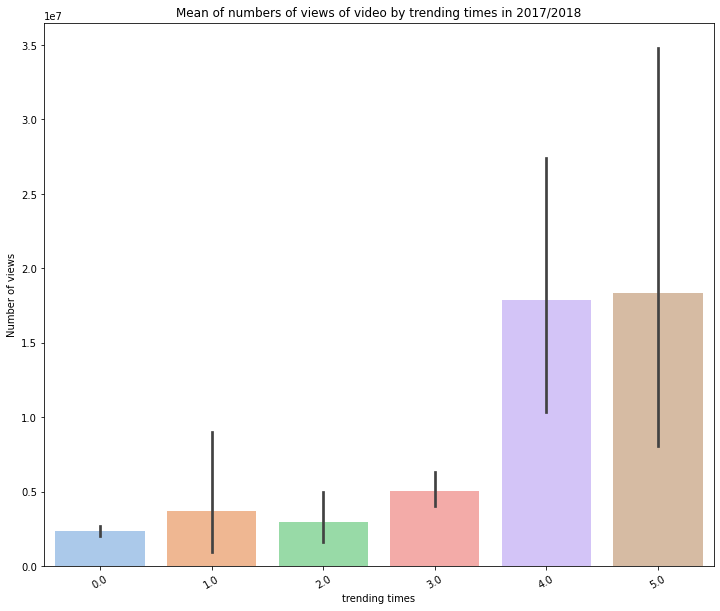

In [18]:
# Mean of numbers of views of video by trending times in 2017/2018
figure = plt.figure(figsize=(12,10))
colors = sns.color_palette('pastel')[0:15]
plt.xticks(rotation=30)
plt.title('Mean of numbers of views of video by trending times in 2017/2018')
sns.barplot(x='trending times', y='Number of views', 
            data=data17_18.sort_values(by=['trending times']), palette=colors)

<AxesSubplot:title={'center':'Mean of numbers of views of video by trending times in 2020/2022'}, xlabel='trending times', ylabel='Number of views'>

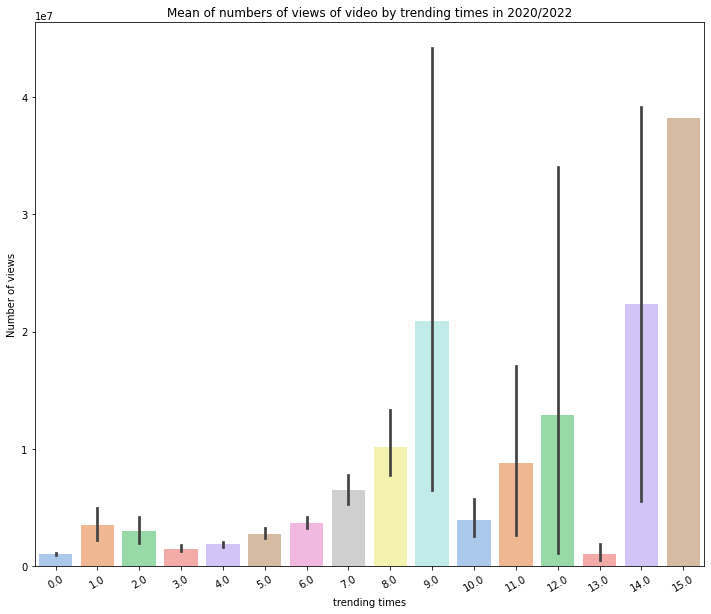

In [19]:
# Mean of numbers of views of video by trending times in 2020/2022
figure = plt.figure(figsize=(12,10))
colors = sns.color_palette('pastel')[0:15]
plt.xticks(rotation=30)
plt.title('Mean of numbers of views of video by trending times in 2020/2022')
sns.barplot(x='trending times', y='Number of views', 
            data=data20_22.sort_values(by=['trending times']), palette=colors)

<AxesSubplot:title={'center':'Mean of numbers of likes of video by trending times in 2017/2018'}, xlabel='trending times', ylabel='Number of likes'>

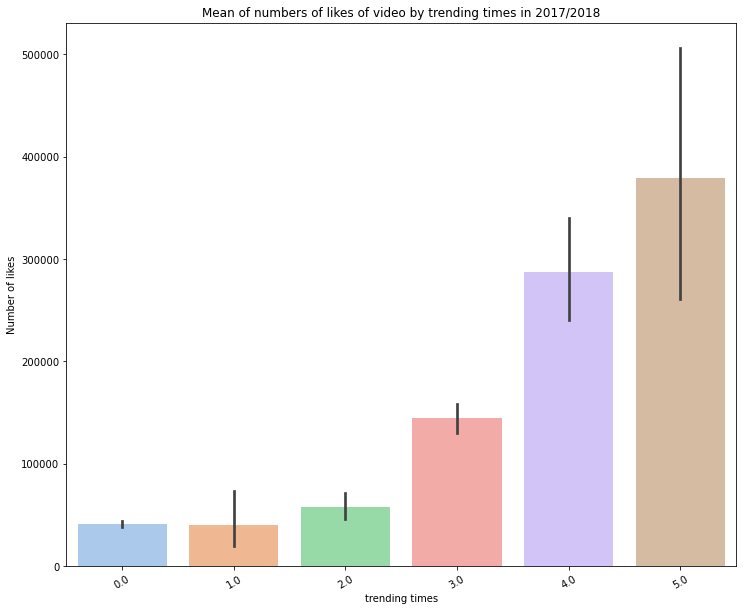

In [20]:
# Mean of numbers of likes of video by trending times in 2017/2018
figure = plt.figure(figsize=(12,10))
colors = sns.color_palette('pastel')[0:15]
plt.xticks(rotation=30)
plt.title('Mean of numbers of likes of video by trending times in 2017/2018')
sns.barplot(x='trending times', y='Number of likes', 
            data=data17_18.sort_values(by=['trending times']), palette=colors)

<AxesSubplot:title={'center':'Mean of numbers of likes of video by trending times in 2020/2022'}, xlabel='trending times', ylabel='Number of likes'>

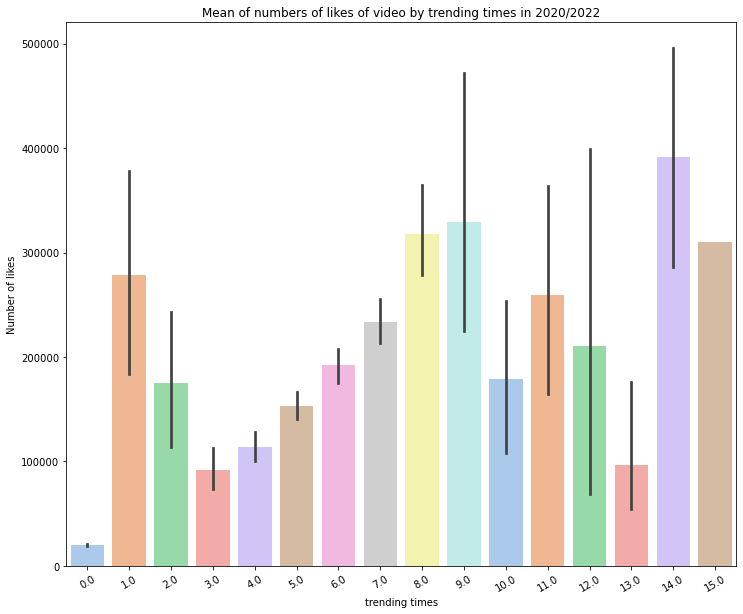

In [21]:
# Mean of numbers of likes of video by trending times in 2020/2022
figure = plt.figure(figsize=(12,10))
colors = sns.color_palette('pastel')[0:15]
plt.xticks(rotation=30)
plt.title('Mean of numbers of likes of video by trending times in 2020/2022')
sns.barplot(x='trending times', y='Number of likes', 
            data=data20_22.sort_values(by=['trending times']), palette=colors)

<AxesSubplot:title={'center':'Mean of numbers of comments of video by trending times in 2017/2018'}, xlabel='trending times', ylabel='Number of comments'>

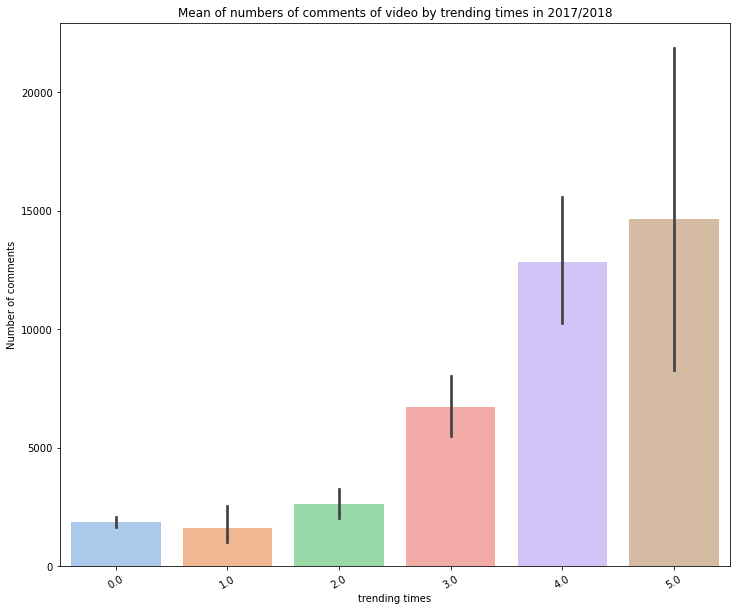

In [22]:
# Mean of numbers of comments of video by trending times in 2017/2018
figure = plt.figure(figsize=(12,10))
colors = sns.color_palette('pastel')[0:15]
plt.xticks(rotation=30)
plt.title('Mean of numbers of comments of video by trending times in 2017/2018')
sns.barplot(x='trending times', y='Number of comments', 
            data=data17_18.sort_values(by=['trending times']), palette=colors)

<AxesSubplot:title={'center':'Mean of numbers of comments of video by trending times in 2020/2022'}, xlabel='trending times', ylabel='Number of comments'>

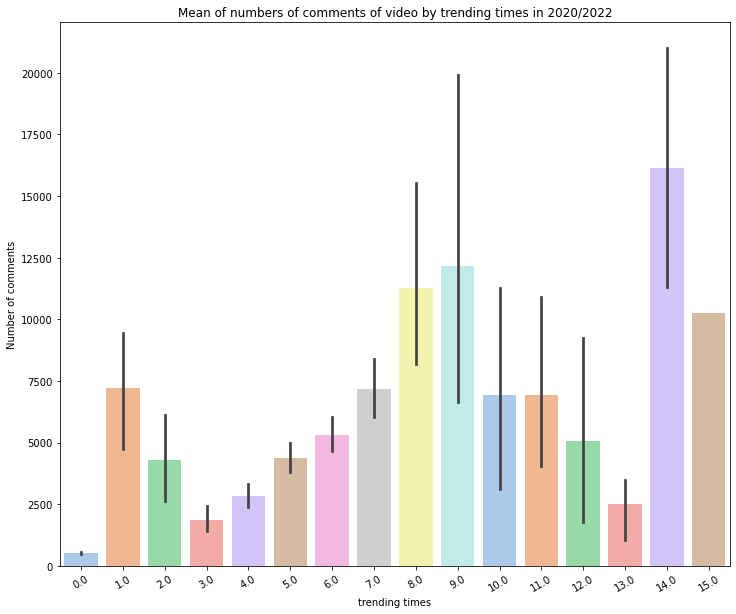

In [23]:
# Mean of numbers of comments of video by trending times in 2020/2022
figure = plt.figure(figsize=(12,10))
colors = sns.color_palette('pastel')[0:15]
plt.xticks(rotation=30)
plt.title('Mean of numbers of comments of video by trending times in 2020/2022')
sns.barplot(x='trending times', y='Number of comments', 
            data=data20_22.sort_values(by=['trending times']), palette=colors)

<AxesSubplot:title={'center':'Number of comments and trending times in 2017/2018'}, xlabel='Number of comments', ylabel='trending times'>

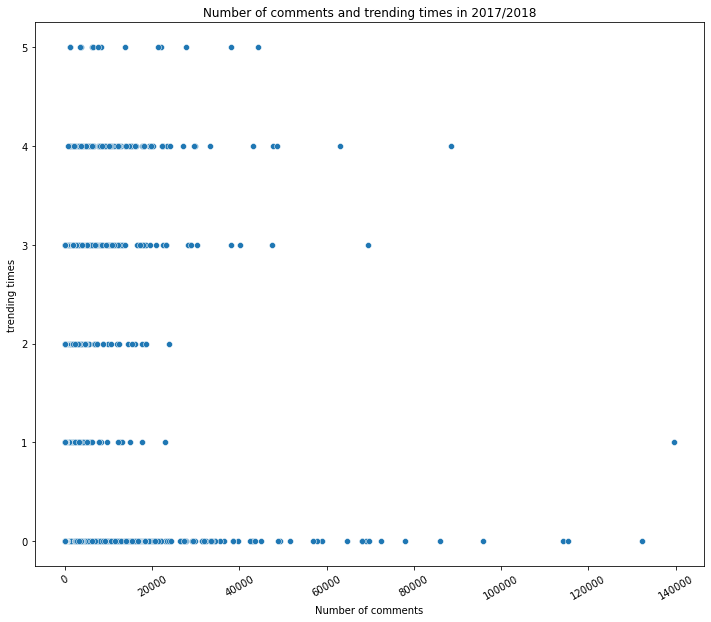

In [24]:
# Number of comments and trending times in 2017/2018
figure = plt.figure(figsize=(12,10))
colors = sns.color_palette('pastel')[0:15]
plt.xticks(rotation=30)
plt.title('Number of comments and trending times in 2017/2018')
sns.scatterplot(data=data17_18, x='Number of comments', y='trending times')

<AxesSubplot:title={'center':'Number of comments and trending times in 2017/2018'}, xlabel='Number of comments', ylabel='trending times'>

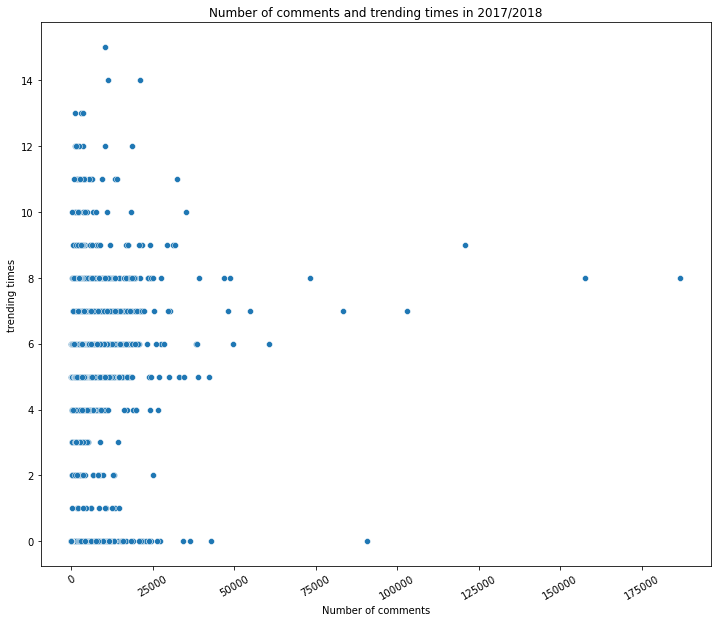

In [25]:
# Number of comments and trending times in 2020/2022
figure = plt.figure(figsize=(12,10))
colors = sns.color_palette('pastel')[0:15]
plt.xticks(rotation=30)
plt.title('Number of comments and trending times in 2017/2018')
sns.scatterplot(data=data20_22, x='Number of comments', y='trending times')

<AxesSubplot:title={'center':'Title length and trending times in 2017/2018'}, xlabel='Title', ylabel='Category'>

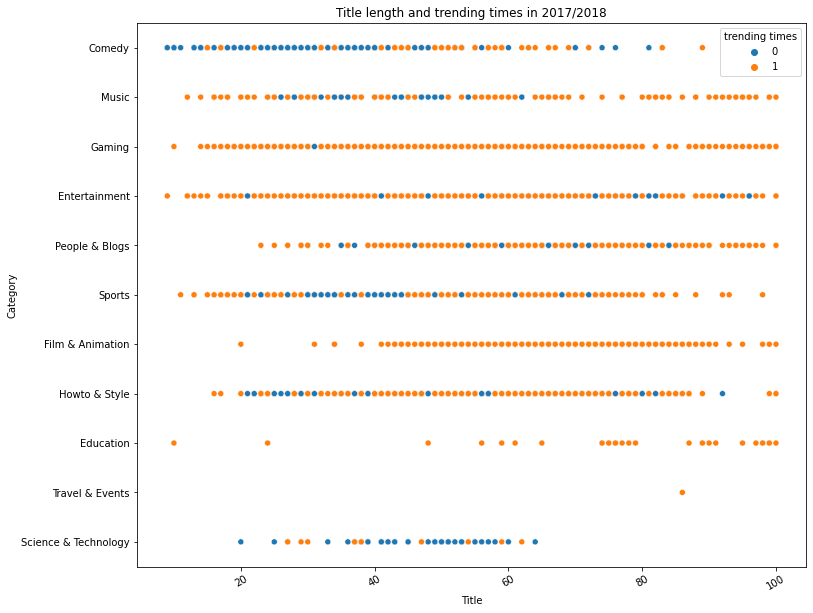

In [26]:
# title length and trending times in 2017/2018
figure = plt.figure(figsize=(12,10))
colors = sns.color_palette('pastel')[0:15]
plt.xticks(rotation=30)
plt.title('Title length and trending times in 2017/2018')
title_length = data17_18['Title'].apply(lambda x : len(str(x)))
sns.scatterplot(data=data17_18, x=title_length, y='Category', hue=(data17_18['trending times']==0).apply(lambda x :int(x)))

<AxesSubplot:title={'center':'Title length and trending times in 2017/2018'}, xlabel='Title', ylabel='Category'>

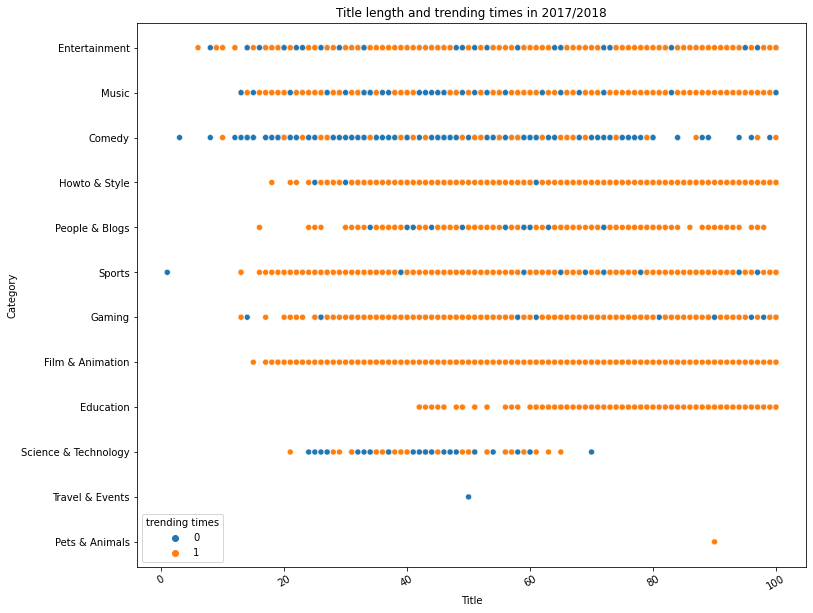

In [27]:
# title length and trending times in 2020/2022
figure = plt.figure(figsize=(12,10))
colors = sns.color_palette('pastel')[0:15]
plt.xticks(rotation=30)
plt.title('Title length and trending times in 2017/2018')
title_length = data20_22['Title'].apply(lambda x : len(str(x)))
sns.scatterplot(data=data20_22, x=title_length, y='Category', hue=(data20_22['trending times']==0).apply(lambda x :int(x)))

<AxesSubplot:title={'center':'description length and trending times in 2017/2018'}, xlabel='Description', ylabel='Category'>

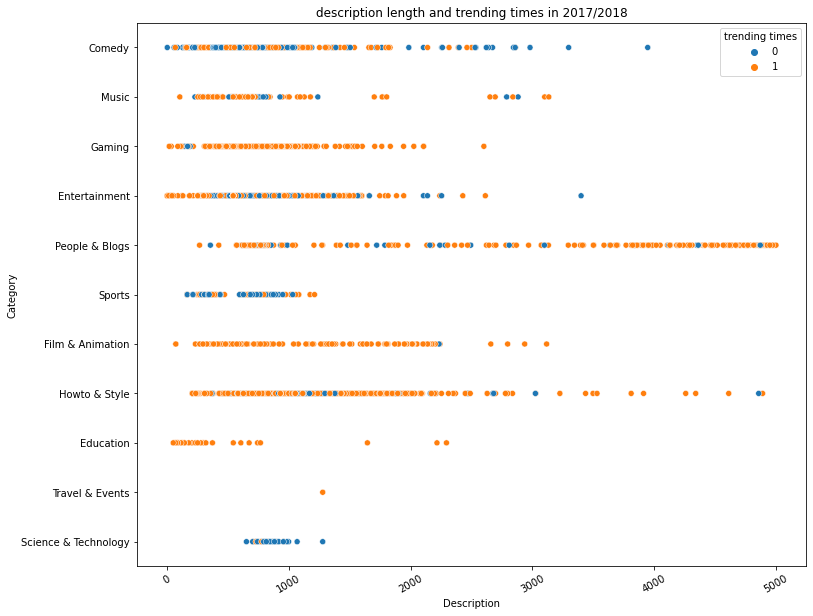

In [28]:
# description length and trending times in 2017/2018
figure = plt.figure(figsize=(12,10))
colors = sns.color_palette('pastel')[0:15]
plt.xticks(rotation=30)
plt.title('description length and trending times in 2017/2018')
desc_length = data17_18['Description'].apply(lambda x : len(str(x)))
sns.scatterplot(data=data17_18, x=desc_length, y='Category', hue=(data17_18['trending times']==0).apply(lambda x :int(x)))

<AxesSubplot:title={'center':'description length and trending times in 2017/2018'}, xlabel='Description', ylabel='Category'>

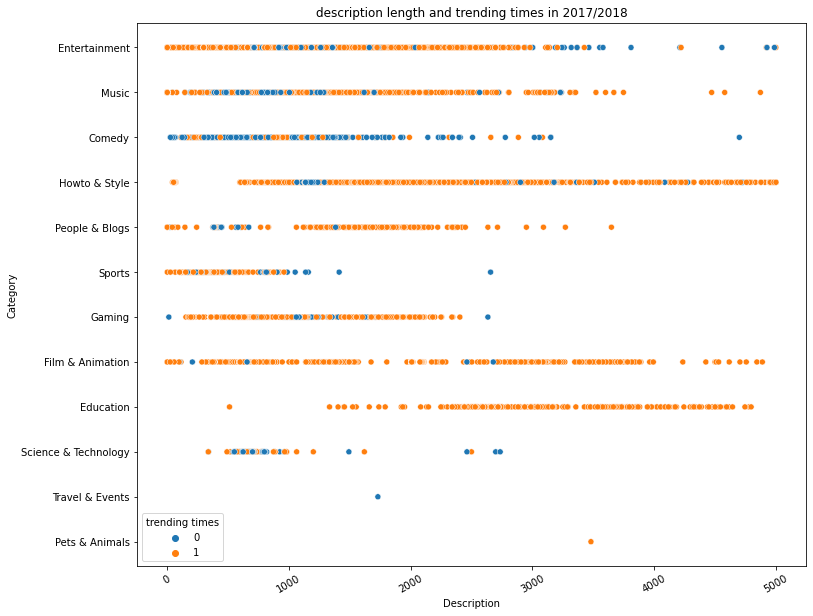

In [29]:
# description length and trending times in 2020/2022
figure = plt.figure(figsize=(12,10))
colors = sns.color_palette('pastel')[0:15]
plt.xticks(rotation=30)
plt.title('description length and trending times in 2017/2018')
desc_length = data20_22['Description'].apply(lambda x : len(str(x)))
sns.scatterplot(data=data20_22, x=desc_length, y='Category', hue=(data20_22['trending times']==0).apply(lambda x :int(x)))

<AxesSubplot:title={'center':'Tags length and trending times in 2017/2018'}, xlabel='Tags', ylabel='Category'>

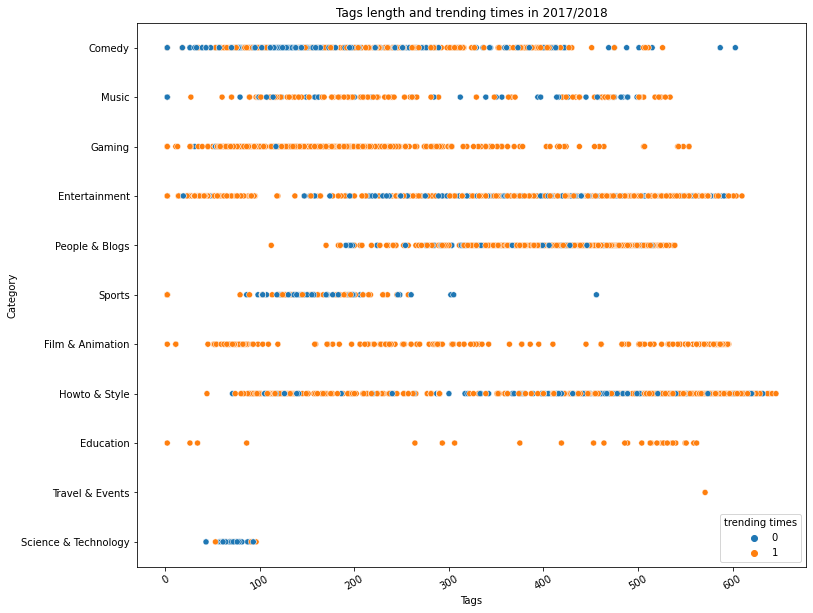

In [30]:
# tags length and trending times in 2017/2018
figure = plt.figure(figsize=(12,10))
colors = sns.color_palette('pastel')[0:15]
plt.xticks(rotation=30)
plt.title('Tags length and trending times in 2017/2018')
tag_length = data17_18['Tags'].apply(lambda x : len(x))
sns.scatterplot(data=data17_18, x=tag_length, y='Category', hue=(data17_18['trending times']==0).apply(lambda x :int(x)))

<AxesSubplot:title={'center':'Tags length and trending times in 2017/2018'}, xlabel='Tags', ylabel='Category'>

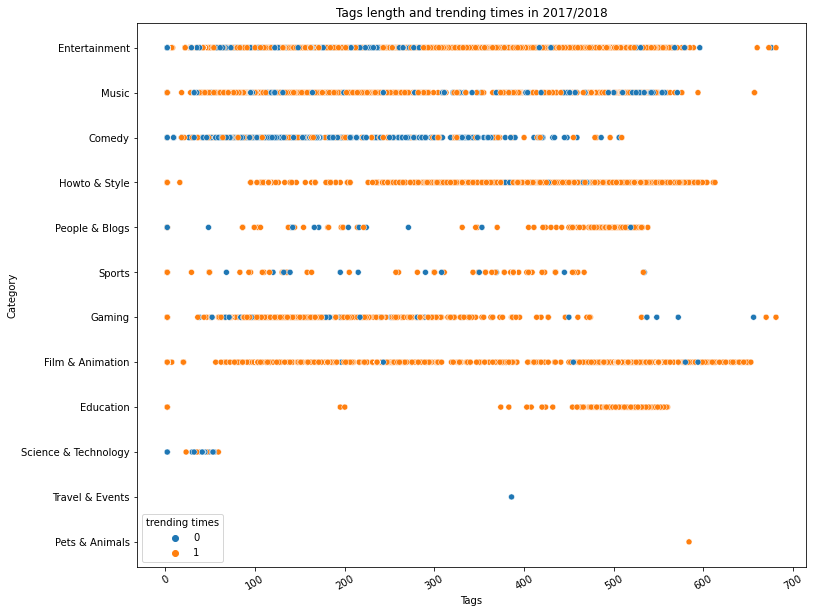

In [31]:
# tags length and trending times in 2017/2018
figure = plt.figure(figsize=(12,10))
colors = sns.color_palette('pastel')[0:15]
plt.xticks(rotation=30)
plt.title('Tags length and trending times in 2017/2018')
tag_length = data20_22['Tags'].apply(lambda x : len(x))
sns.scatterplot(data=data20_22, x=tag_length, y='Category', hue=(data20_22['trending times']==0).apply(lambda x :int(x)))

<AxesSubplot:title={'center':'Tags length and trending times in 2017/2018'}, xlabel='Tags', ylabel='Number of comments'>

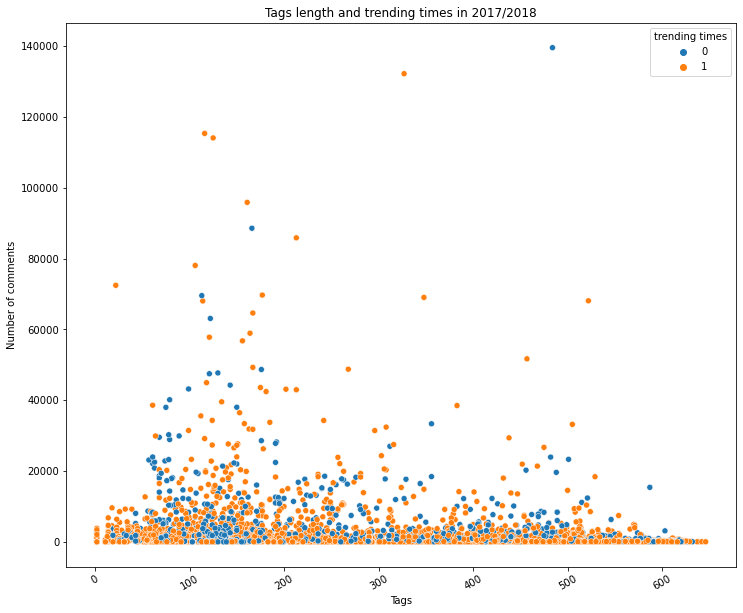

In [32]:
# tags length and trending times in 2017/2018
figure = plt.figure(figsize=(12,10))
colors = sns.color_palette('pastel')[0:15]
plt.xticks(rotation=30)
plt.title('Tags length and trending times in 2017/2018')
tag_length = data17_18['Tags'].apply(lambda x : len(x))
sns.scatterplot(data=data17_18, x=tag_length, y='Number of comments', hue=(data17_18['trending times']==0).apply(lambda x :int(x)))

<AxesSubplot:title={'center':'Tags length and trending times in 2017/2018'}, xlabel='Tags', ylabel='Number of comments'>

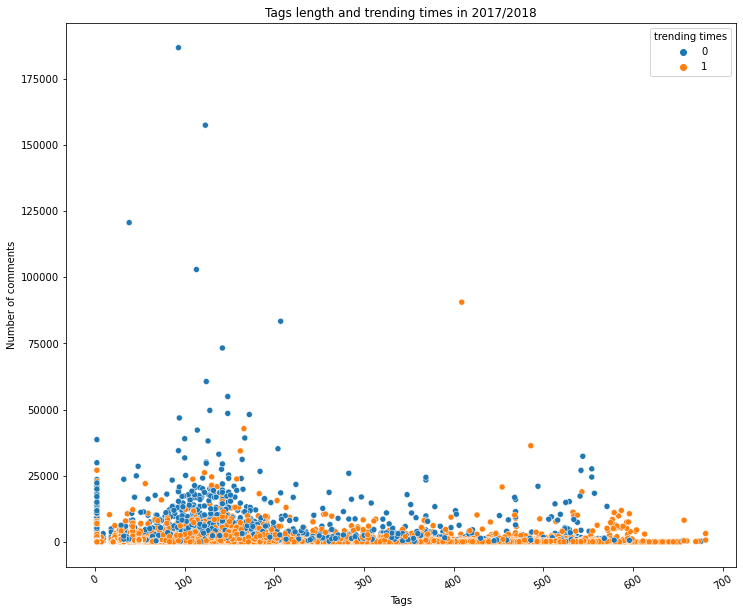

In [33]:
# tags length and trending times in 2020/2022
figure = plt.figure(figsize=(12,10))
colors = sns.color_palette('pastel')[0:15]
plt.xticks(rotation=30)
plt.title('Tags length and trending times in 2017/2018')
tag_length = data20_22['Tags'].apply(lambda x : len(x))
sns.scatterplot(data=data20_22, x=tag_length, y='Number of comments', hue=(data20_22['trending times']==0).apply(lambda x :int(x)))

<AxesSubplot:title={'center':'Time video published and trending times in 2017/2018'}, xlabel='Publish time', ylabel='count'>

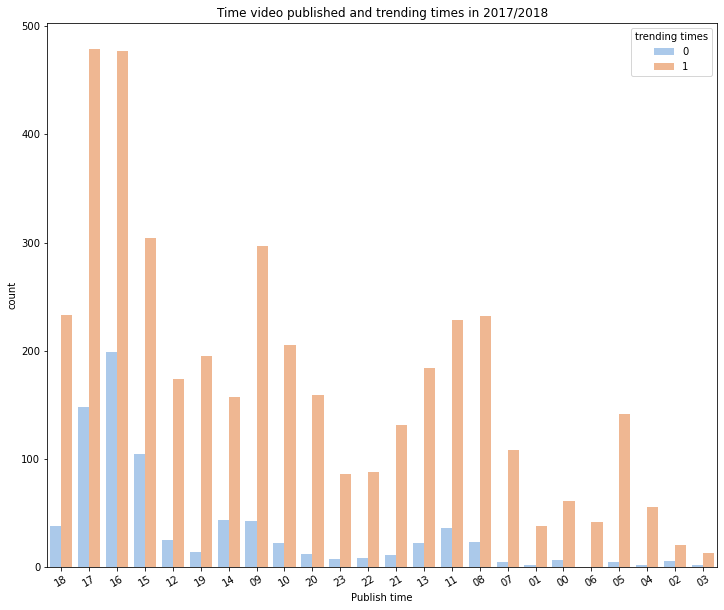

In [34]:
# Time video published and trending times in 2017/2018
figure = plt.figure(figsize=(12,10))
colors = sns.color_palette('pastel')[0:15]
plt.xticks(rotation=30)
plt.title('Time video published and trending times in 2017/2018')
hour = data17_18['Publish time'].apply(lambda x : str(x).split(' ')[1].split(':')[0])

sns.countplot(x=hour, hue=(data17_18['trending times']==0).apply(lambda x :int(x)) , data=data17_18, palette=colors)

<AxesSubplot:title={'center':'Time video published and trending times in 2020/2022'}, xlabel='Publish time', ylabel='count'>

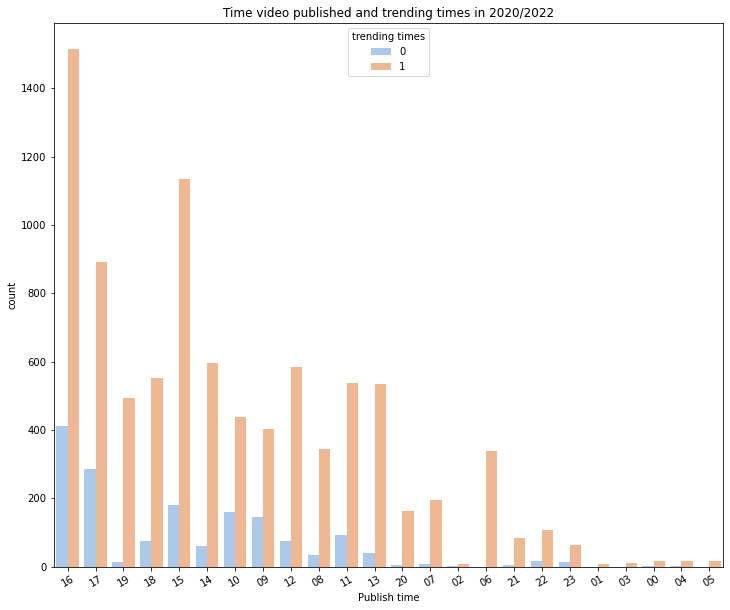

In [35]:
# Time video published and trending times in 2020/2022
figure = plt.figure(figsize=(12,10))
colors = sns.color_palette('pastel')[0:15]
plt.xticks(rotation=30)
plt.title('Time video published and trending times in 2020/2022')
hour = data20_22['Publish time'].apply(lambda x : str(x).split(' ')[1].split(':')[0])

sns.countplot(x=hour, hue=(data20_22['trending times']==0).apply(lambda x :int(x)) , data=data20_22, palette=colors)

## Regression trending times and most variables

In [36]:
# preparing data for algorithm
from sklearn import preprocessing

data = data20_22.copy(deep=True)

le = preprocessing.LabelEncoder()
data['Category'] = le.fit_transform(data['Category'])
data['Publish hour'] = data20_22['Publish time'].apply(lambda x : str(x).split(' ')[1].split(':')[0])
data['tag_length'] = data20_22['Tags'].apply(lambda x : len(x))
data['title_length'] = data20_22['Title'].apply(lambda x : len(str(x)))
data['desc_length'] = data20_22['Description'].apply(lambda x : len(str(x)))

def condition(x):
    if len(str(x).split(":"))==2:
        return str(x).split(":")[0]
    elif len(str(x).split(":"))==3:
        return str(x).split(":")[1]
    else:
        return 0

data['duration_h'] = data20_22['Duration'].apply(lambda x : 0 if len(str(x).split(":"))<3 else str(x).split(":")[-3] )
data['duration_min'] = data20_22['Duration'].apply(lambda x : condition(x))
data.drop(columns=['Publish time','Tags','Title', 'Description', 'Duration', 'Channel Title', 'Video quality' , 'trending for' ], inplace=True)

X = data.drop(columns = ['trending times'])
y = data['trending times']
y[y>1] = 1


In [37]:
data17_18.rename(columns = {'Number of comments' : 'Number_of_comments', 'Number of likes': 'Number_of_likes',
                            'Number of views' : 'Number_of_views', 'Number of favorites' : 'Number_of_favorites',
                            'Video quality' : 'Video_quality', 'trending times' : 'trending_times',
                            'trending for' : 'trending_for'}, inplace=True)

data.rename(columns = {'Number of comments' : 'Number_of_comments', 'Number of likes': 'Number_of_likes',
                            'Number of views' : 'Number_of_views', 'Number of favorites' : 'Number_of_favorites',
                            'Video quality' : 'Video_quality', 'trending times' : 'trending_times',
                            'trending for' : 'trending_for'}, inplace=True)

In [38]:
# Fit regression
import statsmodels.regression.linear_model as sm
estm2 = sm.OLS.from_formula('trending_times ~ tag_length + title_length', data).fit()
print(estm2.params)# Create a coordinate grid
tag_length = np.arange(0,300)
title_length = np.arange(0,70)

B1, B2 = np.meshgrid(tag_length, title_length, indexing='xy')
Z = np.zeros((title_length.size, tag_length.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(estm2.params[0] + B1[i,j]*estm2.params[1] + B2[i,j]*estm2.params[2])

Intercept       0.422911
tag_length     -0.000488
title_length   -0.002248
dtype: float64


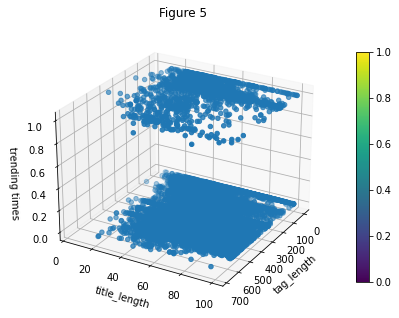

In [39]:
# Figure 5 - Multiple Linear Regression
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = axes3d.Axes3D(fig)
ax.set_title('Figure 5');


# Plot best fit plane
points = ax.scatter3D(data['tag_length'], data['title_length'], data['trending_times'], cmap="seismic", vmin=-5, vmax=5)
plt.colorbar(points, cax=fig.add_axes([0.9, 0.1, 0.03, 0.8]))
ax.set_xlabel('tag_length')
ax.set_ylabel('title_length'); ax.set_ylim(bottom=0)
ax.set_zlabel('trending times');
ax.view_init(25, 30)

In [40]:
estm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         trending_times   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     512.0
Date:                Thu, 30 Jun 2022   Prob (F-statistic):          4.71e-213
Time:                        14:43:35   Log-Likelihood:                -3726.5
No. Observations:               10689   AIC:                             7459.
Df Residuals:                   10686   BIC:                             7481.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4229      0.011     39.089      0.000       0.402       0.444
tag_length      -0.0005   1.93e-05    -25.233      0.000      -0.001      -0.000
title_length    -0.0022      0.000    -13.021      0.000      -0.003      -0.002
==============================================================================
Omnibus:                     2833.219   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5695.925
Skew:                           1.654   Prob(JB):                         0.00
Kurtosis:                       4.359   Cond. No.                     1.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
estm3 = sm.OLS.from_formula('trending_times ~ Category + tag_length + title_length + desc_length + duration_min + duration_h', data).fit()

In [42]:
estm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         trending_times   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     28.99
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:43:36   Log-Likelihood:                -3243.9
No. Observations:               10689   AIC:                             6636.
Df Residuals:                   10615   BIC:                             7174.
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.4928      0.021     23.597      0.000       0.452       0.534
duration_min[T.1]     -0.0210      0.025     -0.832      0.405      -0.070       0.028
duration_min[T.10]    -0.0256      0.021     -1.244      0.214      -0.066       0.015
duration_min[T.11]     0.0131      0.023      0.581      0.561      -0.031       0.057
duration_min[T.12]     0.0758      0.024      3.182      0.001       0.029       0.122
duration_min[T.13]     0.1025      0.025      4.039      0.000       0.053       0.152
duration_min[T.14]     0.1324      0.026      5.154      0.000       0.082       0.183
duration_min[T.15]     0.1256      0.025      4.976      0.000       0.076       0.175
duration_min[T.16]     0.0848      0.026      3.304      0.001       0.034       0.135
duration_min[T.17]     0.0890      0.029      3.115      0.002       0.033       0.145
duration_min[T.18]     0.1388      0.031      4.500      0.000       0.078       0.199
duration_min[T.19]     0.1315      0.031      4.286      0.000       0.071       0.192
duration_min[T.2]      0.0460      0.023      1.998      0.046       0.001       0.091
duration_min[T.20]     0.0947      0.032      2.981      0.003       0.032       0.157
duration_min[T.21]     0.1063      0.035      3.039      0.002       0.038       0.175
duration_min[T.22]     0.1063      0.036      2.921      0.003       0.035       0.178
duration_min[T.23]     0.0998      0.040      2.469      0.014       0.021       0.179
duration_min[T.24]     0.1637      0.043      3.793      0.000       0.079       0.248
duration_min[T.25]     0.1140      0.039      2.930      0.003       0.038       0.190
duration_min[T.26]     0.0458      0.030      1.548      0.122      -0.012       0.104
duration_min[T.27]     0.1302      0.039      3.303      0.001       0.053       0.207
duration_min[T.28]     0.1690      0.043      3.891      0.000       0.084       0.254
duration_min[T.29]     0.2563      0.060      4.275      0.000       0.139       0.374
duration_min[T.3]      0.1050      0.022      4.734      0.000       0.062       0.148
duration_min[T.30]     0.1080      0.041      2.604      0.009       0.027       0.189
duration_min[T.31]     0.1087      0.043      2.524      0.012       0.024       0.193
duration_min[T.32]     0.0649      0.043      1.519      0.129      -0.019       0.149
duration_min[T.33]    -0.0051      0.044     -0.115      0.908      -0.092       0.082
duration_min[T.34]     0.1293      0.047      2.770      0.006       0.038       0.221
duration_min[T.35]     0.0625      0.050      1.253      0.210      -0.035       0.160
duration_min[T.36]     0.0577      0.057      1.014      0.311      -0.054       0.169
duration_min[T.37]     0.0649      0.058      1.111      0.266      -0.050       0.179
duration_min[T.38]     0.1531      0.0

In [43]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=12345)

In [44]:
def inv_dist(distance):
    weights = 1/(distance**0.3)
    return weights


In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, weights=inv_dist)

In [46]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(weights=<function inv_dist at 0x0000022F045EDCA8>)

In [47]:
y_pred = knn_model.predict(X_test)

In [48]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    "    This function prints and plots the confusion matrix.\n",
    "    Normalization can be applied by setting `normalize=True`.\n",

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

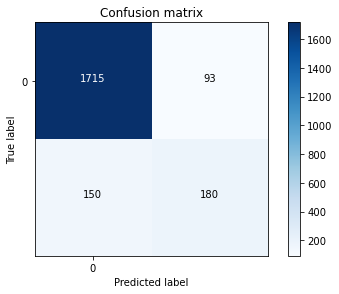

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred )
plot_confusion_matrix(cm, classes = range(1))

In [50]:
from sklearn import svm
#, kernel='poly',degree=3,
clf = svm.SVC(C=1000, class_weight='balanced', verbose=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

[LibSVM]

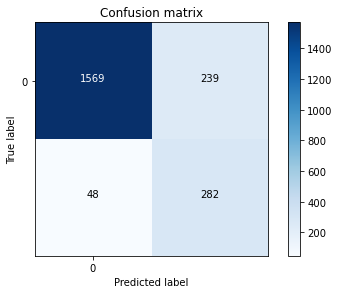

In [51]:
cm = confusion_matrix(y_test, y_pred )
plot_confusion_matrix(cm, classes = range(1))

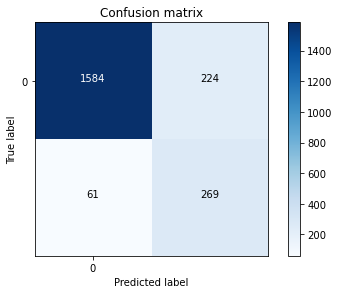

In [52]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='liblinear', class_weight='balanced').fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred )
plot_confusion_matrix(cm, classes = range(1))

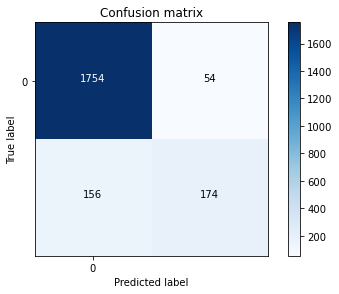

In [53]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred )
plot_confusion_matrix(cm, classes = range(1))